## [作業重點]
目前你應該已經要很清楚資料集中，資料的型態是什麼樣子囉！包含特徵 (features) 與標籤 (labels)。因此要記得未來不管什麼專案，必須要把資料清理成相同的格式，才能送進模型訓練。
今天的作業開始踏入決策樹這個非常重要的模型，請務必確保你理解模型中每個超參數的意思，並試著調整看看，對最終預測結果的影響為何

## 作業

1. 試著調整 DecisionTreeClassifier(...) 中的參數，並觀察是否會改變結果？
2. 改用其他資料集 (boston, wine)，並與回歸模型的結果進行比較

### Iris

In [73]:
from sklearn import datasets, metrics, linear_model

# 如果是分類問題，請使用 DecisionTreeClassifier，若為回歸問題，請使用 DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [81]:
for i in range(2,6):
    print(i)

2
3
4
5


In [90]:
score.shape

NameError: name 'score' is not defined

0.9333333333333333


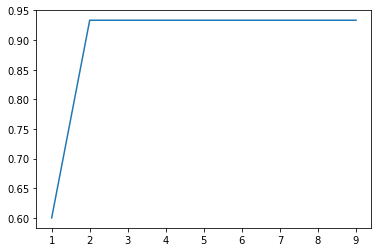

In [93]:
# 讀取鳶尾花資料集
iris = datasets.load_iris()

# 切分訓練集/測試集
x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, random_state=4)
score = clf.score(x_test, y_test)
print(score)

# 建立模型
x = []
y = []
for i in range(1,10):
    clf = DecisionTreeClassifier(max_depth = i)
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    x.append(i)
    y.append(metrics.accuracy_score(y_test, y_pred))
plt.plot(x, y)
plt.show()

In [94]:
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [95]:
print("Feature importance: ", clf.feature_importances_)

Feature importance:  [0.         0.01482213 0.0502622  0.93491566]


### boston_tree

In [66]:
# 讀取boston資料集
boston = datasets.load_boston()

# 切分訓練集/測試集
x_train, x_test, y_train, y_test = train_test_split(boston.data, boston.target, test_size=0.1, random_state=4)

# 建立模型
clr = DecisionTreeRegressor()

# 訓練模型
clr.fit(x_train, y_train)

# 預測測試集
y_pred = clr.predict(x_test)

In [67]:
# 預測值與實際值的差距，使用 MSE, MAE, RSquare
mae = metrics.mean_absolute_error(y_pred, y_test) # 使用 MAE 評估
mse = metrics.mean_squared_error(y_pred, y_test) # 使用 MSE 評估
r2 = metrics.r2_score(y_pred, y_test) # 使用 r-square 評估
print("MAE: ", mae)
print("MSE: ", mse)
print("R-square: ", r2)

MAE:  3.935294117647058
MSE:  24.33980392156863
R-square:  0.7386692454716735


In [52]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [31]:
import os     
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

In [53]:
# https://ppt.cc/fxmnAx
from sklearn.tree import export_graphviz
import pydotplus
dot_data=export_graphviz(clr, out_file=None, feature_names=boston.feature_names)
graph=pydotplus.graph_from_dot_data(dot_data)
graph.write_pdf('clr.pdf')

True

In [58]:
from IPython.display import Image  
dot_data = export_graphviz(clr, out_file=None, 
                         feature_names=boston.feature_names,  
                         class_names= 'boston',  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png()) 

### Boston_LR

In [64]:
# 讀取boston資料集
boston = datasets.load_boston()

# 切分訓練集/測試集
x_train, x_test, y_train, y_test = train_test_split(boston.data, boston.target, test_size=0.1, random_state=4)

# 建立一個線性回歸模型
regr = linear_model.LinearRegression()

# 將訓練資料丟進去模型訓練
regr.fit(x_train, y_train)

# 將測試資料丟進模型得到預測結果
y_pred = regr.predict(x_test)

In [65]:
# 可以看回歸模型的參數值
print('Coefficients: ', regr.coef_)

# 預測值與實際值的差距，使用 MSE, MAE, RSquare
mae = metrics.mean_absolute_error(y_pred, y_test) # 使用 MAE 評估
mse = metrics.mean_squared_error(y_pred, y_test) # 使用 MSE 評估
r2 = metrics.r2_score(y_pred, y_test) # 使用 r-square 評估
print("MAE: ", mae)
print("MSE: ", mse)
print("R-square: ", r2)

Coefficients:  [-1.25856659e-01  4.84257396e-02  1.84085281e-02  3.08509569e+00
 -1.73277018e+01  3.61674713e+00  2.19181853e-03 -1.49361132e+00
  3.19979200e-01 -1.27294649e-02 -9.27469086e-01  9.50912468e-03
 -5.33592471e-01]
MAE:  3.1811607520875436
MSE:  17.038701324921963
R-square:  0.7172311397420825
